# Bumblebees and Flowers

Lets simulate the adventures of a bumblebee in a field of flowers with the following assumptions:

- In our simulation there exist a fixed number of flowers. 
- Pollen can be harvested by a bumblebee from each flower.
- The mean amount of pollen that can be harvested is different from flower to flower.
- The amount of pollen for a specific visit is determined by a Gaussian distribution.
- The Bumblebee tries to figure out what the best flowers are, measured by expected amount of pollen.

For the simulation we use the two classes FlowerField and Bumblebee. Lets get a feeling for them first before we start the simulation.

In [1]:
from course_001_FlowerField import FlowerField

In [2]:
ff = FlowerField()
ff.visit_flower_nr(3)

3.645039071283078

In [3]:
from course_001_Bumblebee import Bumblebee

In [4]:
bb = Bumblebee()

In [5]:
bb.memory_df

,preference,n_times_visited
0,7.999771e-11,0.0
1,1.936189e-11,0.0
2,9.605702e-11,0.0
3,5.780311e-11,0.0
4,6.978241e-11,0.0
5,5.239420e-11,0.0
6,9.681741e-11,0.0
7,1.276476e-11,0.0
8,8.742369e-11,0.0
9,4.792004e-11,0.0


In [6]:
bb.choose_flower()

6

In [7]:
bb.update_memory(flower_id=6, amount_of_pollen=8)

## First contact with a reinforcement learning Setup using just numpy/pandas

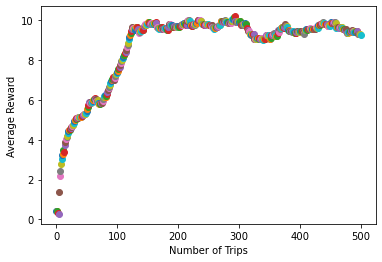

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(42)

plt.xlabel("Number of Trips")
plt.ylabel("Average Reward")

ff = FlowerField()
bb = Bumblebee()
n_trips = 500

aops = []
for trip in range(n_trips):
    flower_id = bb.choose_flower()
    amount_of_polen = ff.visit_flower_nr(flower_id)
    bb.update_memory(flower_id, amount_of_polen)
    aops = [amount_of_polen] + aops
    
    average_to_see_through_the_noise = True
    if average_to_see_through_the_noise:
        plt.scatter(trip, np.mean(aops[:50]))
    else:
        plt.scatter(trip, amount_of_polen)
    